In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

print(0.0002/0.0005)

0.4


In [ ]:
import torch
import numpy as np
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
classes=['covid','normal','pneumonia']
my_distribution=np.array([6534,7151,4273])
class_weights1 = torch.from_numpy(np.divide(1, my_distribution)).float().to(device)
print(class_weights1)
print(class_weights1.sum())
class_weights = class_weights1 / class_weights1.sum()
for i, c in enumerate(classes):
  print('Weight for class %s: %f' % (c, class_weights.cpu().numpy()[i]))

tensor([0.0002, 0.0001, 0.0002], device='cuda:0')
tensor(0.0005, device='cuda:0')
Weight for class covid: 0.290457
Weight for class normal: 0.265396
Weight for class pneumonia: 0.444148


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
!pip install efficientnet_pytorch

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=824fe193e8cb76fd90c157bd4e680c979bcfb12655d8b32ea709dfeb20f35b27
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
Successfully built efficientnet-pytorch


In [ ]:
#!mkdir testset

In [ ]:
!pip install timm

     |████████████████████████████████| 376 kB 13.6 MB/s 


In [ ]:
#!unzip test_set.zip

In [ ]:
import torch.nn as nn  
from efficientnet_pytorch import EfficientNet
from torchvision import models
######################## efficientnet b3 #####################
model_t = EfficientNet.from_pretrained("efficientnet-b3")
model_t._fc=nn.Linear(model_t._fc.in_features, 3)        
model2=model_t
########################## DensNet201 ###########################
model_ft = models.densenet201(pretrained=True)
num_ftrs = model_ft.classifier.in_features
model_ft.classifier= nn.Linear(num_ftrs, 3)
model1=model_ft

model_ftn = models.densenet201(pretrained=True)
num_ftrs = model_ftn.classifier.in_features
model_ftn.classifier= nn.Linear(num_ftrs, 3)
modeln=model_ftn

model_ftn = models.densenet201(pretrained=True)
num_ftrs = model_ftn.classifier.in_features
model_ftn.classifier= nn.Linear(num_ftrs, 3)
modelnn=model_ftn
############################### DensNet161################
model_ft = models.densenet161(pretrained=True)
num_ftrs = model_ft.classifier.in_features
model_ft.classifier= nn.Linear(num_ftrs, 3)
model4=model_ft
############################### efficientnetb0 #################
import torch.nn as nn  
from efficientnet_pytorch import EfficientNet
from torchvision import models
model_t0 = EfficientNet.from_pretrained("efficientnet-b0")
model_t0._fc=nn.Linear(model_t0._fc.in_features, 3)        
model3=model_t0
import timm
class ViTBase16(nn.Module):
    def __init__(self, model_name, n_classes, pretrained=False):

        super(ViTBase16, self).__init__()

        self.model = timm.create_model(model_name, pretrained=pretrained)
        self.model.head = nn.Linear(self.model.head.in_features, n_classes)
        # self.model.head = nn.Sequential(nn.Linear(self.model.head.in_features, 512),
        #                                 nn.Dropout(0.5),
        #                                 nn.ReLU(True),
        #                                 nn.Linear(512,n_classes),
        #                                 )
        #self.model.classifier = nn.Linear(self.model.classifier.in_features, n_classes)

    def forward(self, x):
        x = self.model(x)
        return x
model = ViTBase16('vit_base_patch16_224',n_classes=3, pretrained=True)
model_t=model

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b3-5fb5a3c3.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b3-5fb5a3c3.pth


  0%|          | 0.00/47.1M [00:00<?, ?B/s]

Loaded pretrained weights for efficientnet-b3


Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth


  0%|          | 0.00/77.4M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


  0%|          | 0.00/110M [00:00<?, ?B/s]

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth


  0%|          | 0.00/20.4M [00:00<?, ?B/s]

Loaded pretrained weights for efficientnet-b0


In [ ]:
#!mkdir validationdata

In [ ]:
############# Ensmebling of different models ###########
def get_model_DesnNet201(PATH):
    model = model1
    #checkpoint = torch.load(PATH)
    model.load_state_dict(torch.load(PATH))
    model.eval()
    return model.to(device)

def get_model_DesnNet201n(PATH):
    model = modeln
    #checkpoint = torch.load(PATH)
    model.load_state_dict(torch.load(PATH))
    model.eval()
    return model.to(device)

def get_model_DesnNet201nn(PATH):
    model = modelnn
    #checkpoint = torch.load(PATH)
    model.load_state_dict(torch.load(PATH))
    model.eval()
    return model.to(device)

def get_model_DesnNet161(PATH):
    model = model4
    #checkpoint = torch.load(PATH)
    model.load_state_dict(torch.load(PATH))
    model.eval()
    return model.to(device)

def get_model_Effib3(PATH):
    model=model2
    #checkpoint = torch.load(PATH)
    model.load_state_dict(torch.load(PATH))
    model.eval()
    return model.to(device)
def get_model_Effib0(PATH):
    model = model3
    #checkpoint = torch.load(PATH)
    model.load_state_dict(torch.load(PATH))
    model.eval()
    return model.to(device)

def get_model_transformer(PATH):
    model = model_t
    #checkpoint = torch.load(PATH)
    model.load_state_dict(torch.load(PATH))
    model.eval()
    return model.to(device)

In [ ]:
# Ensembling different trained models
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class EnsembledModel():

    def __init__(self, model_paths):
        super().__init__()
        self.num_models = len(model_paths)

        self.leafmodel1 = get_model_DesnNet201(model_paths[0])
        #self.leafmodel2 = get_model_Effib3(model_paths[1])
        #self.leafmodel3 = get_model_DesnNet201nn(model_paths[2])
        #self.leafmodel4 = get_model_DesnNet201n(model_paths[3])
        #self.leafmodel5 = get_model_transformer(model_paths[4])
        

    def predict(self, x):
        with torch.no_grad():
            l1 = self.leafmodel1(x)
            #l2 = self.leafmodel2(x)
            #l3=self.leafmodel3(x)
            #l4=self.leafmodel4(x)
            #l5=self.leafmodel5(x)
            #b4_e1 = self.effb4_model1(x)
            pred = (l1) / (self.num_models)
            #pred = (l1+l2+l4) 
            #pred = l4

            return pred

In [ ]:
import torch
model_paths = [
    '/content/drive/MyDrive/Models/model_DesNetlast.pth',
    #'/content/drive/MyDrive/Models/model_efficientsb3.pth',
    #'/content/drive/MyDrive/Models/model_DesNetn.pth',
    #'/content/drive/MyDrive/Models/modelDensnet220.pth',
    #'/content/drive/MyDrive/Models/model_transformers.pth',
]

model_e = EnsembledModel(model_paths)

In [ ]:
!pip install ttach

In [ ]:
# Prediciton method

import os
import pandas as pd
from PIL import Image
import numpy as np
import cv2
from collections import defaultdict
import copy
import random
import shutil
import albumentations as A
#from albumentations.pytorch import ToTensorV2
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.optim
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cudnn.benchmark = True
from torchvision import transforms
import ttach as tta
import natsort

#transforms11 = tta.Compose(
    #[
        #tta.HorizontalFlip(),
        #tta.Rotate90(angles=[0, 180]),
        #tta.Scale(scales=[1, 2, 4]),
        #tta.Multiply(factors=[0.9, 1, 1.1]),        
    #]
#)
valid_transform=transforms.Compose([#transforms.Resize(224),
                                   transforms.ToTensor(),
                                   transforms.Normalize([0.485,0.456,0.406],[0.299,0.224,0.225])
                                   ])
#tta_model = tta.SegmentationTTAWrapper(model, transforms)
####################### path of test dataset ######################
path_test="/content/drive/MyDrive/testset"
lstdir=os.listdir(path_test)
data = {
    'case': [],
    'class': [],
} 
featclass3=[]
labels=[]
for i in natsort.natsorted(lstdir):
  #print(i)
  pathtest=os.path.join(path_test,i)
  #print(pathtest)
  img=cv2.imread(pathtest)
  img_bgr_rgb= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  resized = cv2.resize(img_bgr_rgb,(256,256), interpolation = cv2.INTER_CUBIC)
  #image=Image.open(pathval)
  image = Image.fromarray(resized)
  #image=Image.open(pathval)
  #image_g=np.array(Image.open(pathval))
  img_t=valid_transform(image)
  #print(img_t.shape)
  img_t1=torch.unsqueeze(img_t,dim=0)
  #print(img_t1.shape)
  img_t1=img_t1.float().to(device)
  #model=model.to(device)
  #tta_model = tta.ClassificationTTAWrapper(model_e.predict, tta.aliases.five_crop_transform(224,224))
  #tta_model = tta.ClassificationTTAWrapper(model_e.predict, tta.aliases.ten_crop_transform(224,224))
  #tta_model= tta.ClassificationTTAWrapper(model_e.predict, transforms)
  ############### tis test time augmentation provided best score so far########
  tta_model = tta.ClassificationTTAWrapper(model_e.predict, tta.aliases.flip_transform())
  # tta.aliases.flip_transform() define horizontal and vertical flip boths #####
  outputs = tta_model(img_t1)
  #outputs=torch.nn.Softmax(outputs,1)
  _, predicted = torch.max(outputs.data, 1) # take maximum index from logitis or predcition
    
  feat=np.array(outputs.data.detach().cpu())
  feat1=np.squeeze(feat)
  #print(feat1)
  featclass3.append(feat1)
  #print(predicted.detach().cpu().numpy())
  p=np.array(predicted.detach().cpu())
  print(np.squeeze(p))
  labels.append(np.squeeze(p))
  #predicted1.append(predicted.detach().cpu().numpy())
  data["case"].append(i)
  data["class"].append(np.squeeze(p)) ## save prediction

2
2
1
1
0
1
0
2
0
2
0
1
2
0
0
2
0
2
2
2
2
0
0
1
0
2
1
2
0
1
1
1
1
1
1
0
0
1
1
1
0
0
0
2
0
2
2
0
1
0
1
2
0
2
1
1
0
1
1
2
0
2
0
0
0
1
0
0
0
0
2
1
0
0
2
0
0
1
2
2
0
0
1
1
2
1
1
1
2
1
2
0
0
0
1
1
0
0
0
0
0
0
1
2
1
2
1
2
1
2
2
1
1
2
2
1
0
2
2
2
0
2
2
2
1
1
1
0
1
1
1
2
1
2
1
2
0
2
1
1
1
1
2
2
2
2
0
1
1
0
0
0
0
1
2
0
1
0
2
1
0
2
0
1
2
0
1
0
2
0
2
0
1
1
1
2
0
2
1
2
0
2
2
1
1
2
1
0
2
1
1
0
2
0
1
1
0
1
1
1
1
0
0
0
0
2
1
1
1
2
1
2
0
0
0
1
2
0
2
0
1
1
1
0
0
1
1
1
0
0
1
2
0
1
1
0
2
1
2
2
1
0
0
1
2
2
0
0
2
0
2
1
2
2
1
1
0
1
0
2
0
0
2
2
2
1
1
0
1
0
0
1
1
1
0
0
0
2
1
2
2
2
2
1
1
2
0
2
2
0
1
2
2
2
2
1
2
1
1
1
0
2
0
0
0
0
0
0
0
0
2
0
1
2
1
1
2
2
0
2
0
0
1
0
0
0
0
2
2
2
2
1
0
0
1
0
0
2
0
2
0
2
1
0
2
0
1
2
1
1
0
2
0
0
1
0
2
2
1
2
2
1
0
1
1
0
2
1
0
0
2
1
0
0
0
1
1
2
1
2
2
0
1
0
2
1
0
0
2
0
2
2
0
0
1
1
0
1
1
1
2
2
1
2
0
1
2
2
2
1
2
0
1
2
2
2
2
1
1
2
2
1
0
2
0
0
1
0
1
0
2
1
0
0
1
0
0
2
1
1
2
0
0
2
1
0
1
2
1
1
0
2
2
0
0
1
2
1
2
2
2
1
1
2
1
2
1
1
0
0
1
2
2
2
0
0
2
1
2
0
2
0
1
0
0
1
1
1
1
0
0
2
1
0
1
0
1
1
0
1


In [ ]:
############## save prediction in csv for submission on leaderboard #########
import pandas as pd
df=pd.DataFrame.from_dict(data)
df.to_csv("submission4256.csv",index=False) ## keep in mind, the challenege use zip of csv file
## submissionEnsemble2tt.csv.zip

In [ ]:
farray=np.array(featclass3)
y=np.array(labels)
print(y.shape)

(1200,)


In [ ]:
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns
import pandas as pd  
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(farray) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1200 samples in 0.001s...
[t-SNE] Computed neighbors for 1200 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1200
[t-SNE] Computed conditional probabilities for sample 1200 / 1200
[t-SNE] Mean sigma: 1.910785
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.657120
[t-SNE] KL divergence after 1000 iterations: 0.431885


[Text(0.5, 1.0, ' Feature projection')]

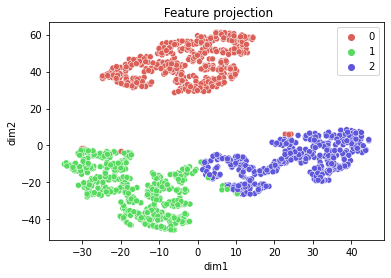

In [ ]:
df = pd.DataFrame()
df["y"] = y
df["dim1"] = z[:,0]
df["dim2"] = z[:,1]

sns.scatterplot(x="dim1", y="dim2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=df).set(title=" Feature projection") 

In [ ]:
# prediciton on validation dataset